<a href="https://colab.research.google.com/github/radhika1603/MRM_ASSIGNMENT-/blob/main/Indian_Food_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

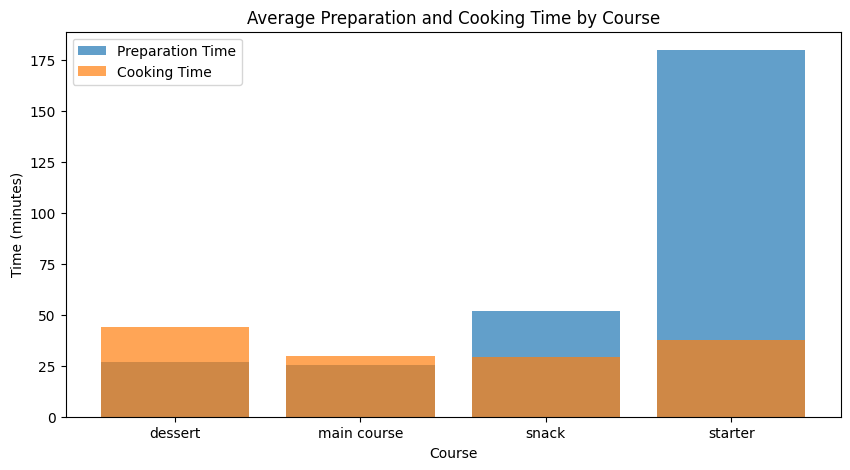

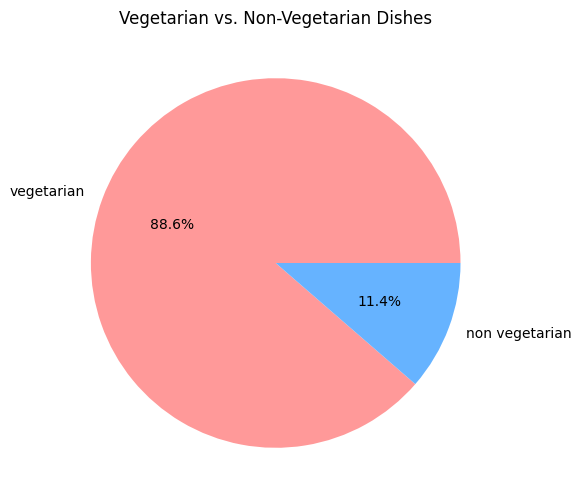

<ipython-input-3-0049d9273009>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="flavor_profile", palette="coolwarm")


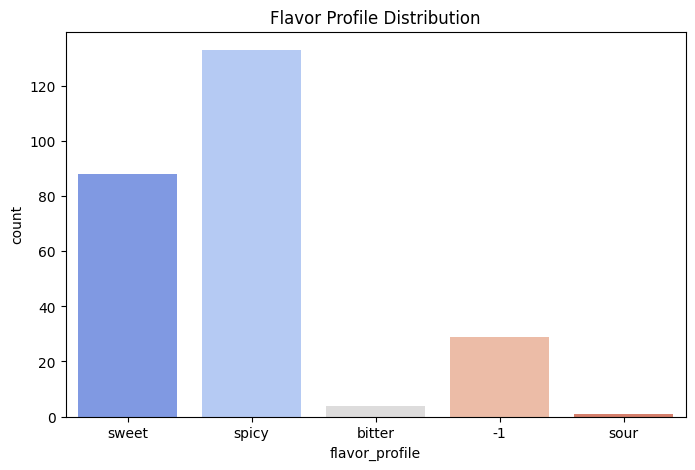

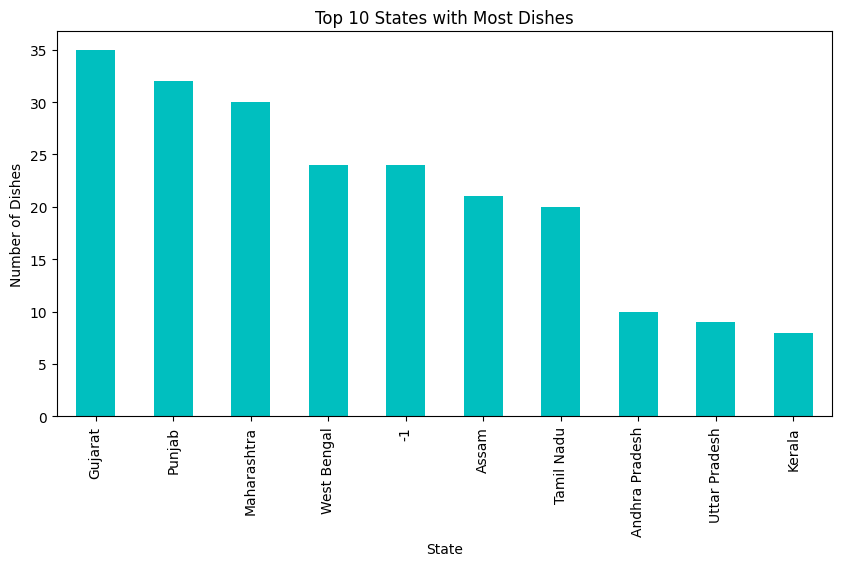

<ipython-input-3-0049d9273009>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="region", palette="Set2")


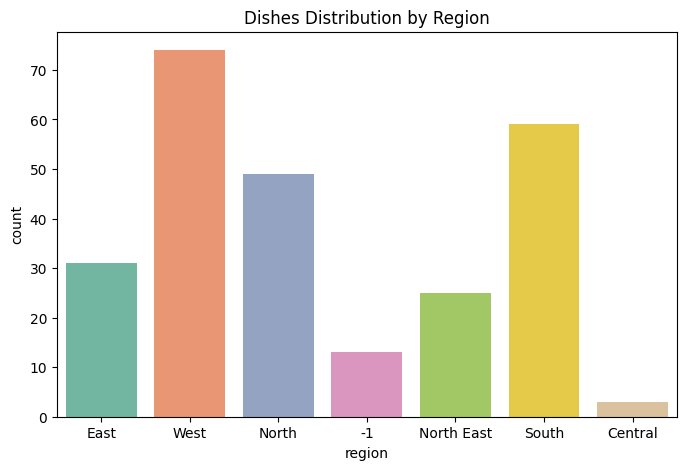

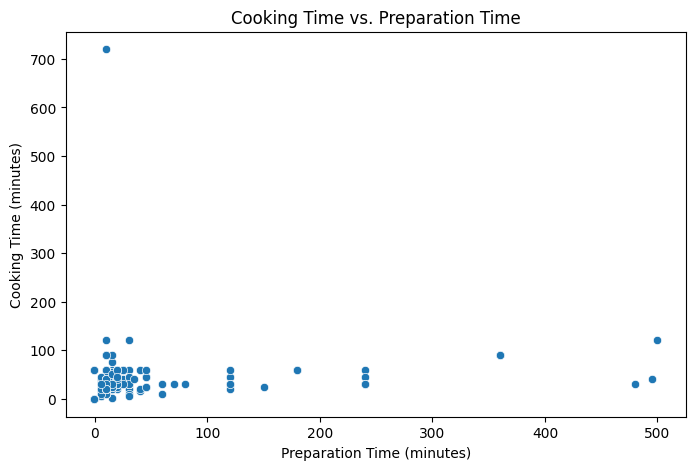

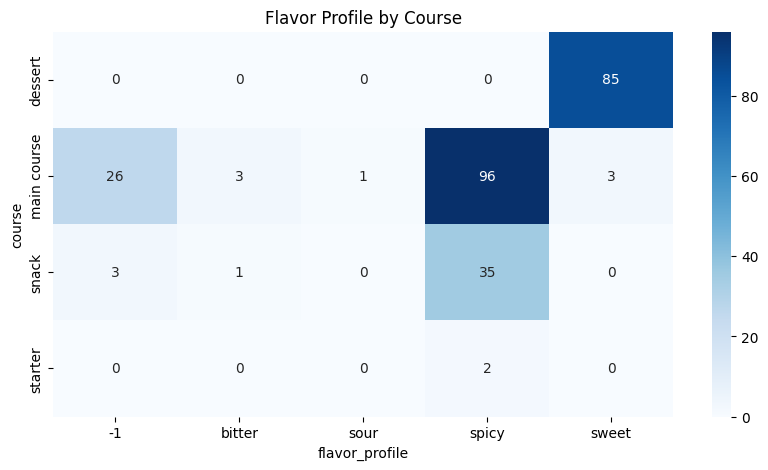

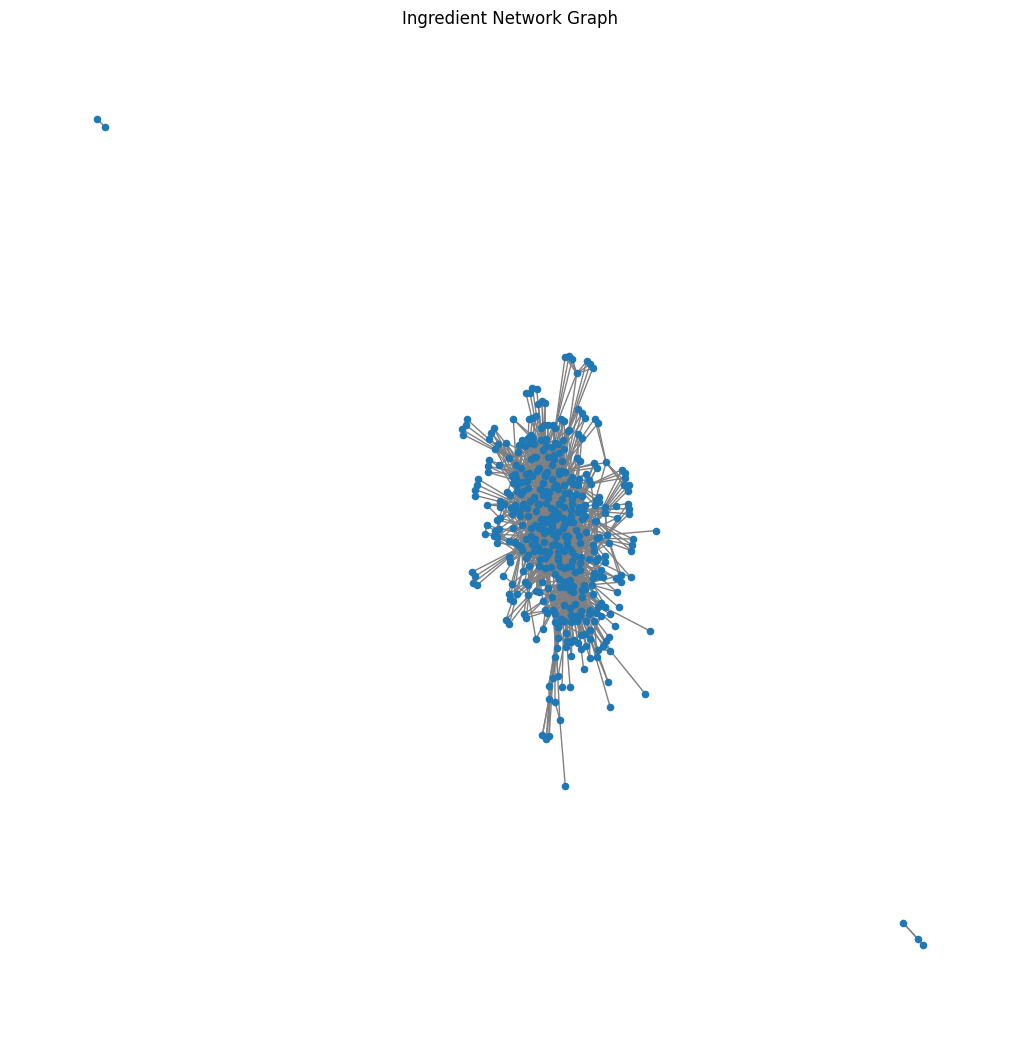

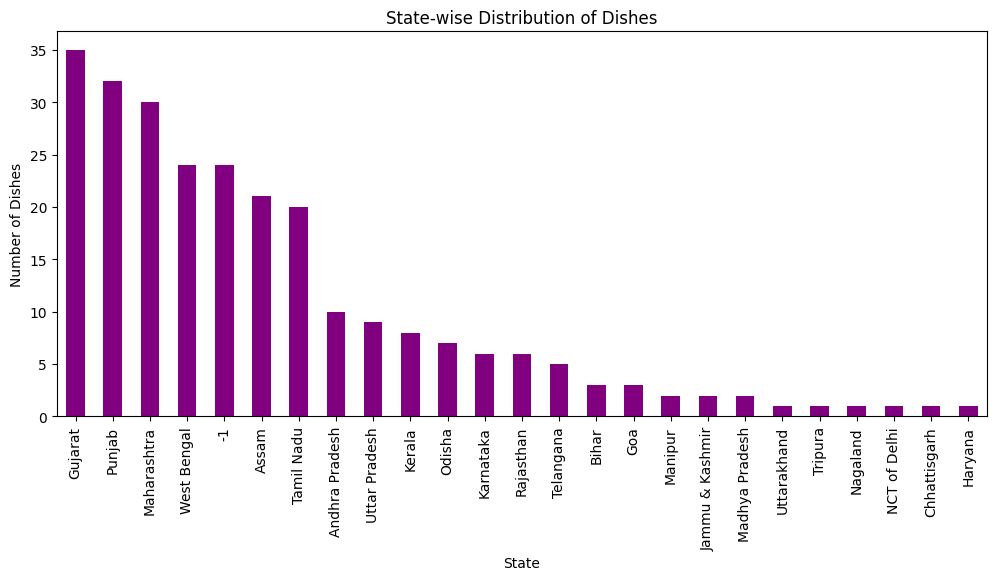

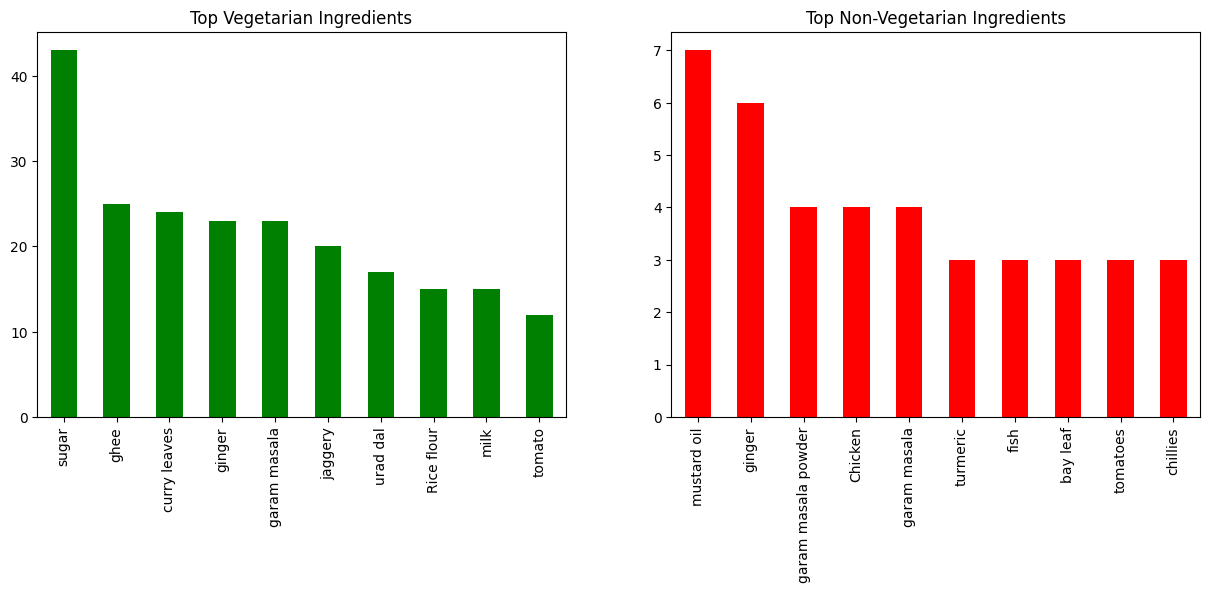

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load dataset
file_path = "/content/indian_food.csv"
df = pd.read_csv(file_path)

# 1. Average preparation and cooking time per course
avg_prep_time = df.groupby("course")["prep_time"].mean()
avg_cook_time = df.groupby("course")["cook_time"].mean()

plt.figure(figsize=(10, 5))
plt.bar(avg_prep_time.index, avg_prep_time.values, label='Preparation Time', alpha=0.7)
plt.bar(avg_cook_time.index, avg_cook_time.values, label='Cooking Time', alpha=0.7)
plt.xlabel("Course")
plt.ylabel("Time (minutes)")
plt.title("Average Preparation and Cooking Time by Course")
plt.legend()
plt.show()

# 2. Vegetarian vs. Non-Vegetarian Distribution
diet_counts = df["diet"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', colors=["#ff9999","#66b3ff"])
plt.title("Vegetarian vs. Non-Vegetarian Dishes")
plt.show()

# 3. Flavor Profile Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="flavor_profile", palette="coolwarm")
plt.title("Flavor Profile Distribution")
plt.show()

# 4. Top 10 States with the Most Dishes
top_states = df["state"].value_counts().head(10)
top_states.plot(kind='bar', figsize=(10, 5), color='c')
plt.xlabel("State")
plt.ylabel("Number of Dishes")
plt.title("Top 10 States with Most Dishes")
plt.show()

# 5. Distribution of Dishes by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="region", palette="Set2")
plt.title("Dishes Distribution by Region")
plt.show()

# 6. Most Common Ingredients in Vegetarian vs. Non-Vegetarian
def extract_ingredients(ingredient_list):
    return [item.strip() for dish in ingredient_list.dropna() for item in dish.split(",")]

# 7. Cooking Time vs. Preparation Time Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["prep_time"], y=df["cook_time"])
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Cooking Time (minutes)")
plt.title("Cooking Time vs. Preparation Time")
plt.show()

# 8. Flavor Profile by Course
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df["course"], df["flavor_profile"]), annot=True, cmap="Blues")
plt.title("Flavor Profile by Course")
plt.show()

# 9. Ingredient Network Analysis
ingredient_pairs = []
for dish in df["ingredients"].dropna():
    ingredients = [item.strip() for item in dish.split(",")]
    for i in range(len(ingredients)):
        for j in range(i + 1, len(ingredients)):
            ingredient_pairs.append((ingredients[i], ingredients[j]))

G = nx.Graph()
G.add_edges_from(ingredient_pairs)
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=20, edge_color="gray", with_labels=False)
plt.title("Ingredient Network Graph")
plt.show()

# 10. State-wise Distribution of Dishes
plt.figure(figsize=(12, 5))
df["state"].value_counts().plot(kind='bar', color='purple')
plt.xlabel("State")
plt.ylabel("Number of Dishes")
plt.title("State-wise Distribution of Dishes")
plt.show()


veg_ingredients = pd.Series(extract_ingredients(df[df["diet"] == "vegetarian"]["ingredients"])).value_counts().head(10)
nonveg_ingredients = pd.Series(extract_ingredients(df[df["diet"] == "non vegetarian"]["ingredients"])).value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
veg_ingredients.plot(kind='bar', ax=axes[0], color='g', title='Top Vegetarian Ingredients')
nonveg_ingredients.plot(kind='bar', ax=axes[1], color='r', title='Top Non-Vegetarian Ingredients')
plt.show()
